In [1]:
import aoai

In [2]:
__ds = aoai.Dataset()
dataset = __ds.get("churn_modelling")[0]

In [4]:
dataset

'C:\\Users\\91930\\Documents\\github-deaxparadox\\ArtOfAI\\dataset\\churn_modelling.csv'

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Data Formatting

In [8]:
data = pd.read_csv(dataset)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
# Country names

data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
# describing the dataset

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# removing unnecessary columns

data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# transforming categorial values in numerical form

labelencoder=LabelEncoder()
data['Gender']=labelencoder.fit_transform(data['Gender'])
data['Geography']=labelencoder.fit_transform(data['Geography'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
data.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
x=data.drop(columns='Exited') # droping coulmn from the feature 
y=data['Exited']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=40)

In [57]:
def bank_customer_churn_bar_chart(feature: str = None, inverse_transform: bool = False):
    
    Exited = data[data['Exited'] == 1][feature].value_counts()
    not_Exited = data[data['Exited'] == 0][feature].value_counts()
    
   
    
    df = pd.DataFrame([Exited, not_Exited])
    df.index = ['Exited', ' Not Exited']

    df.plot(kind='bar', stacked=True, figsize=(10, 5))

    if inverse_transform:
        names = labelencoder.inverse_transform(list(data[feature].unique()))
        plt.legend(names, loc=0)
    
    plt.title(f"Churn by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

# Data visualization

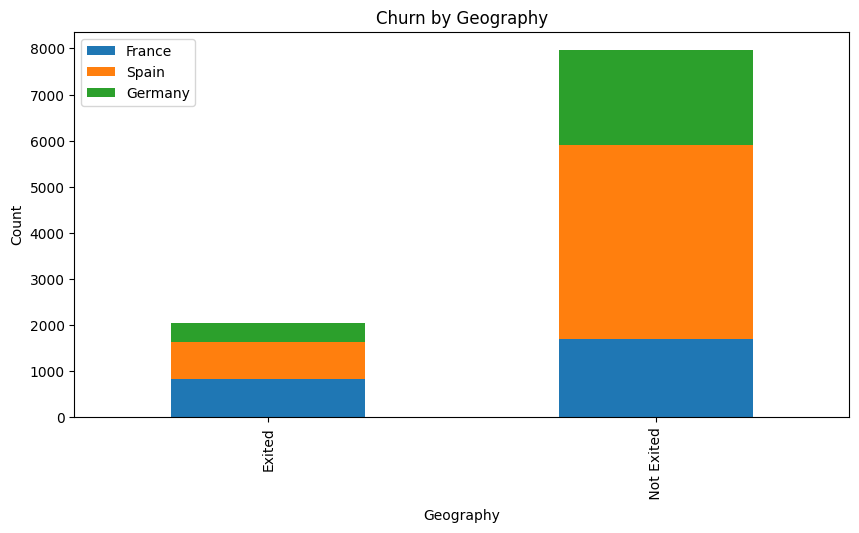

In [58]:
bank_customer_churn_bar_chart('Geography', inverse_transform=True)

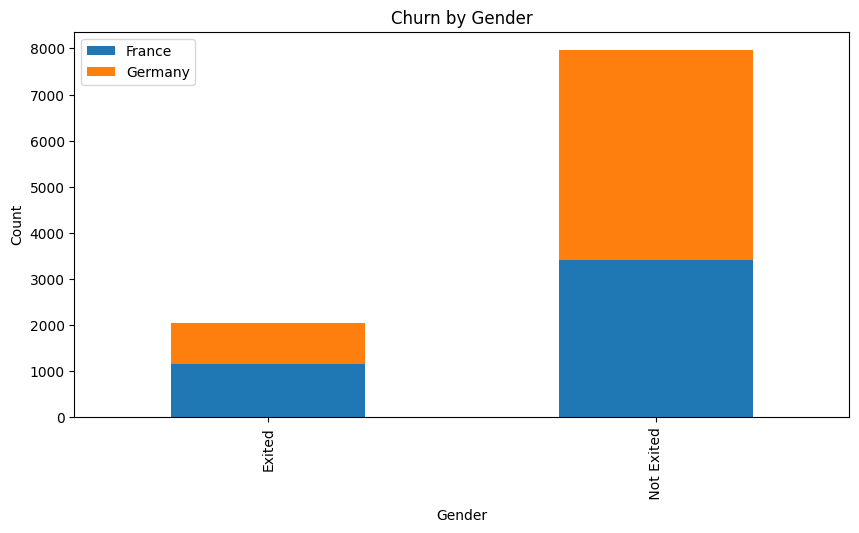

In [59]:
bank_customer_churn_bar_chart('Gender', inverse_transform=True)

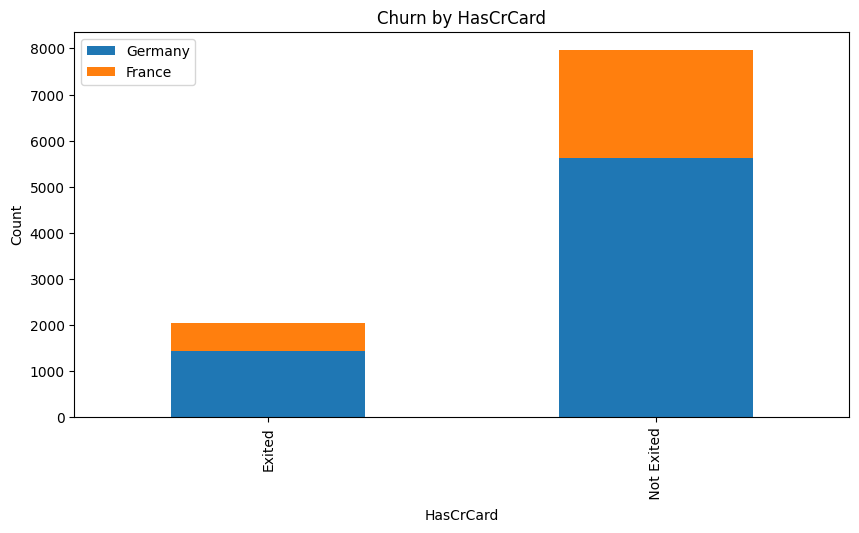

In [60]:
bank_customer_churn_bar_chart('HasCrCard', inverse_transform=True)

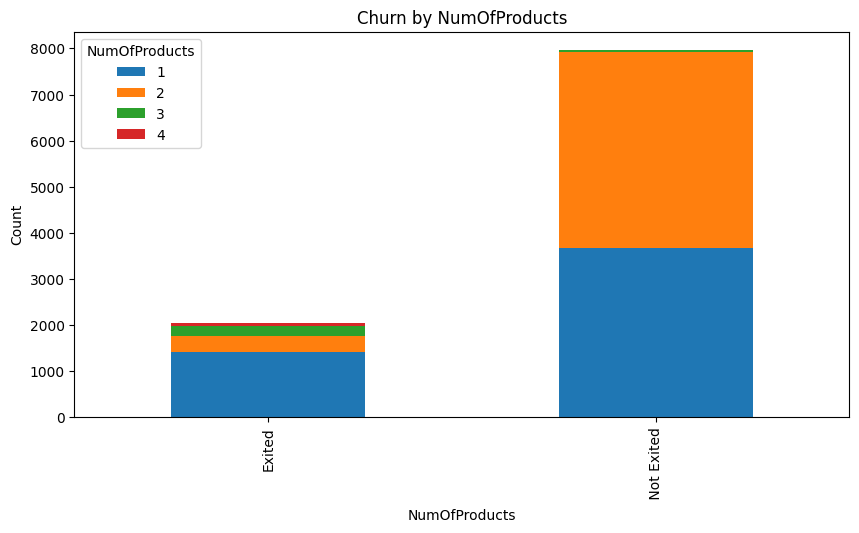

In [61]:
bank_customer_churn_bar_chart('NumOfProducts')

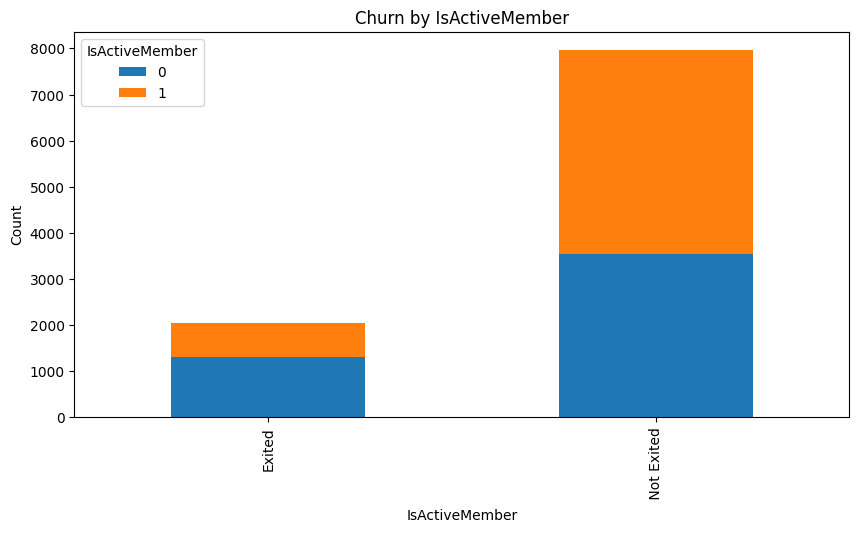

In [63]:
bank_customer_churn_bar_chart('IsActiveMember')

# MODELLING


### KNeighbors Classifier

In [69]:
model = KNeighborsClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

In [70]:


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.762

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2390
           1       0.25      0.09      0.13       610

    accuracy                           0.76      3000
   macro avg       0.53      0.51      0.50      3000
weighted avg       0.69      0.76      0.71      3000


Confusion Matrix:
 [[2233  157]
 [ 557   53]]


### Decision Tree Classifiers

In [71]:
model = DecisionTreeClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)


In [72]:

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7886666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      2390
           1       0.48      0.51      0.50       610

    accuracy                           0.79      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000


Confusion Matrix:
 [[2055  335]
 [ 299  311]]


### Random Forest Classifier

In [75]:
model = SVC()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)


In [76]:

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7966666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2390
           1       0.00      0.00      0.00       610

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000


Confusion Matrix:
 [[2390    0]
 [ 610    0]]


C:\Users\91930\Documents\github-deaxparadox\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91930\Documents\github-deaxparadox\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91930\Documents\github-deaxparadox\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh